# Medical Insurance Price Prediction

#### Import basic libraries

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score,mean_squared_error

#### Read the data

In Python, pd.read_csv() is a function provided by the Pandas library used to read data from a CSV (Comma Separated Values) file into a Pandas DataFrame.

In [126]:
df=pd.read_csv('Medical_insurance - Copy.csv')

In [127]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


#### Number of rows and columns

In [128]:
df.shape

(2772, 7)

#### Some informations about the dataset

The 'df.info()' method in Pandas provides a concise summary of a DataFrame, including information about the DataFrame's structure, data types, memory usage, and presence of missing values.
This method is often used during the initial exploration of a dataset to gain insight into its characteristics.
The Dataset contains numerical values and categorical values.

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


#### To check number of null values present in each column

In [130]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Here, there is no null values in each column

#### Detect and remove duplicate records from the dataset.

In [131]:
df.duplicated().sum()

1435

Here, output value is 1435.That is, the dataset contains duplicates

In [132]:
df=df.drop_duplicates()

In [133]:
df.duplicated().sum()

0

#### Reset the index

In [134]:
df=df.reset_index(drop=True)

In [135]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


# EDA

## Data Visualization

### Univariate

#### Density plot of Age, BMI, Charges

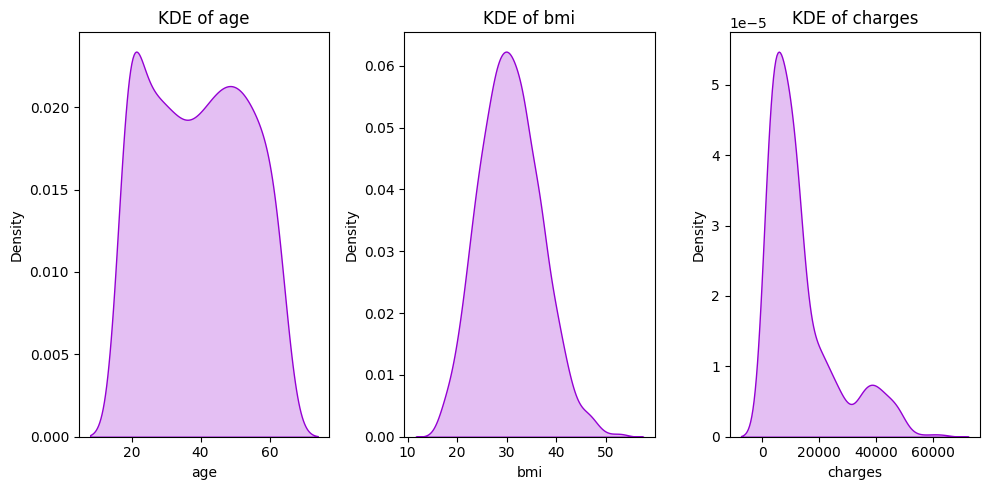

In [38]:
fig, axes = plt.subplots(1,3, figsize=(10,5))
columns = ['age','bmi','charges']
axes = axes.flatten()
for i, col in enumerate(columns):
    sns.kdeplot(data=df[col], ax=axes[i],color='darkviolet', fill=True)
    axes[i].set_title(f'KDE of {col}')
plt.tight_layout()
plt.show()

#### Barplot of Sex, Children, smoker, region

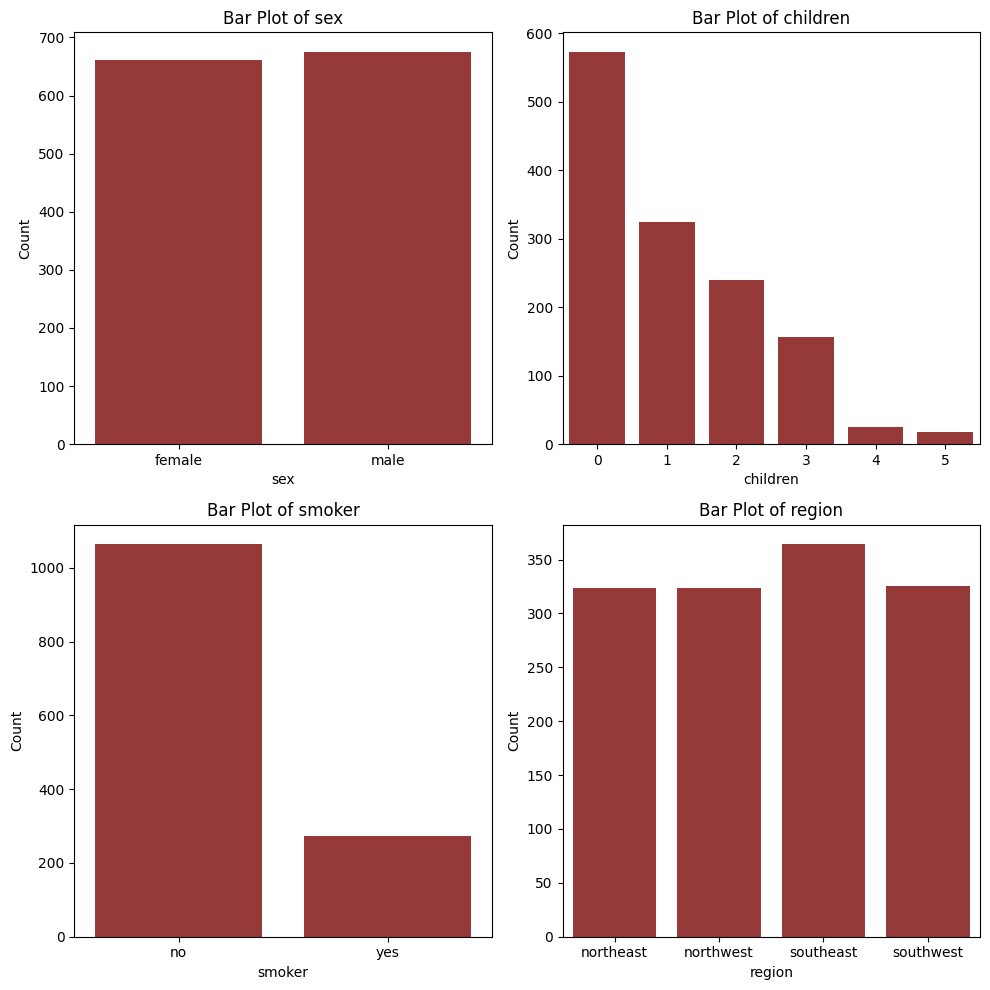

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
columns1 = ['sex','children','smoker','region']
axes = axes.flatten()
for i, col in enumerate(columns1):
    data_counts = df[col].value_counts().sort_index()  # Count occurrences
    sns.barplot(x=data_counts.index, y=data_counts.values, ax=axes[i], color='brown')
    axes[i].set_title(f'Bar Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
plt.tight_layout()

plt.show()

# Bivariate

In [33]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


Bivariate analysis of the column Age and Charges

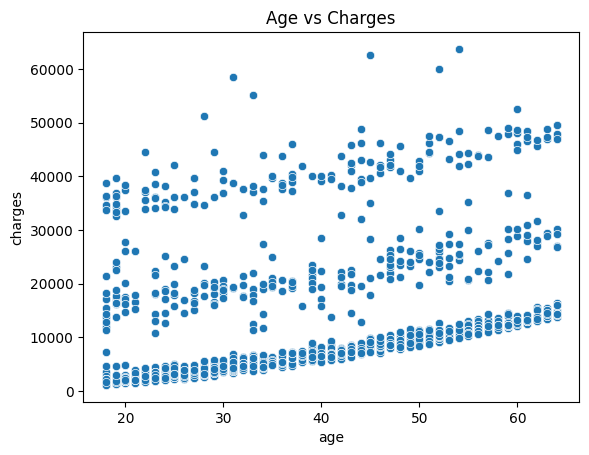

In [34]:
sns.scatterplot(data=df,x='age',y='charges')
plt.title('Age vs Charges')
plt.show()

0 to 10000 charges  the graph is highly overlapped. For more clarification we plot this according to the age group.

In [14]:
print(f"Minimum value in 'Age': {df['age'].min()}")
print(f"Maximum value in 'Age': {df['age'].max()}")

Minimum value in 'Age': 18
Maximum value in 'Age': 64


C:\Users\user\AppData\Local\Temp\ipykernel_8080\1021499932.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_charges_by_age = age_charges_df.groupby('Age Group')['charges'].mean()


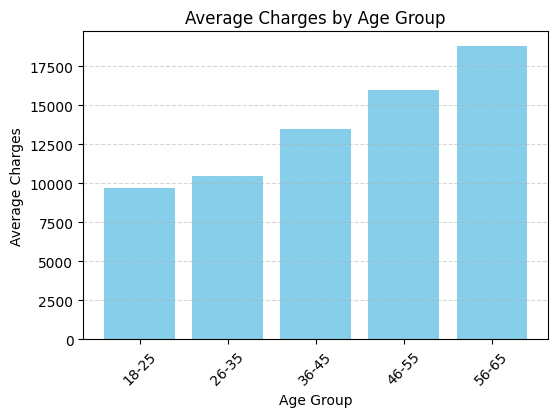

In [15]:
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']
age_classes = pd.cut(df['age'], bins=bins, labels=labels)

# Create a new DataFrame with age classes and charges
age_charges_df = pd.DataFrame({'Age Group': age_classes, 'charges': df['charges']})

# Calculate the average charges for each age group
avg_charges_by_age = age_charges_df.groupby('Age Group')['charges'].mean()
plt.figure(figsize=(6, 4))
plt.bar(avg_charges_by_age.index, avg_charges_by_age.values, color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Average Charges')
plt.title('Average Charges by Age Group')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

Higher charges associated with age groups 56 - 65,lower charges associated with age group 18 - 25.

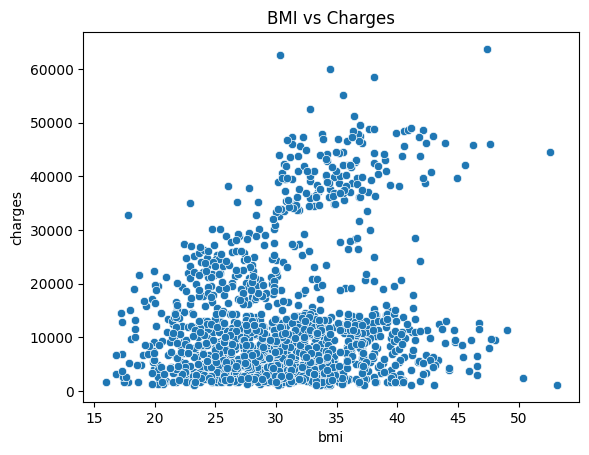

In [35]:
sns.scatterplot(data=df,x='bmi',y='charges')
plt.title('BMI vs Charges')
plt.show()

In [16]:
print(f"Minimum value in 'BMI': {df['bmi'].min()}")
print(f"Maximum value in 'BMI': {df['bmi'].max()}")

Minimum value in 'BMI': 15.96
Maximum value in 'BMI': 53.13


C:\Users\user\AppData\Local\Temp\ipykernel_8080\4130095858.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_charges_by_bmi = bmi_charges_df.groupby('BMI Class')['charges'].mean()


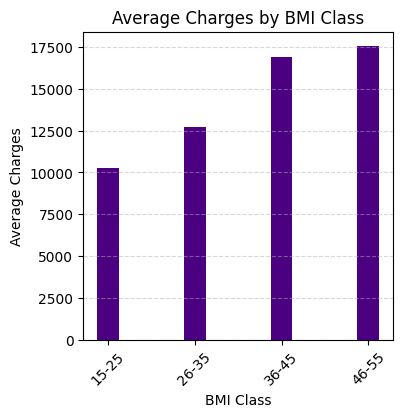

In [19]:
bins = [15,25,35, 45,55]
labels = ['15-25', '26-35',  '36-45','46-55']
bmi_classes = pd.cut(df['bmi'], bins=bins, labels=labels)

# Create a new DataFrame with BMI classes and charges
bmi_charges_df = pd.DataFrame({'BMI Class': bmi_classes, 'charges': df['charges']})

# Calculate the average charges for each BMI class
avg_charges_by_bmi = bmi_charges_df.groupby('BMI Class')['charges'].mean()

# Plot BMI vs average charges
plt.figure(figsize=(4, 4))
plt.bar(avg_charges_by_bmi.index, avg_charges_by_bmi.values, width =0.25,color='indigo')
plt.xlabel('BMI Class')
plt.ylabel('Average Charges')
plt.title('Average Charges by BMI Class')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

The barplot of BMI vs. Charges reveals that individuals with BMI values between 46 and 55 tend to have higher medical charges, particularly falling above 17500.This suggests that there may be a positive association between BMI and medical expenses within this BMI range.

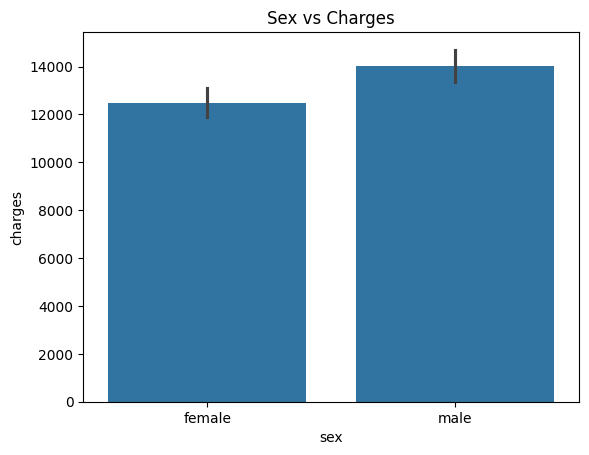

In [36]:
sns.barplot(data=df,x='sex',y='charges')
plt.title('Sex vs Charges')
plt.show()

There is a slight variation of charges according to gender

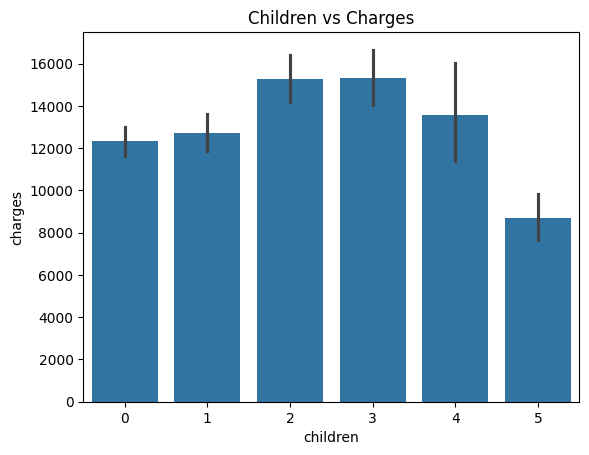

In [37]:
sns.barplot(data=df,x='children',y='charges')
plt.title('Children vs Charges')
plt.show()

According to childrens number, there is small changes in charges.

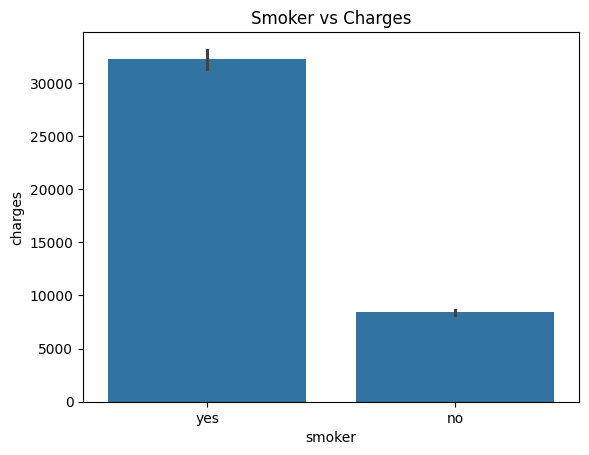

In [38]:

sns.barplot(data=df,x='smoker',y='charges')
plt.title('Smoker vs Charges')
plt.show()

From it is clear that smoker play crucial role in charges. A person who is smoker has high charges as compared to a person who is not a smoker.

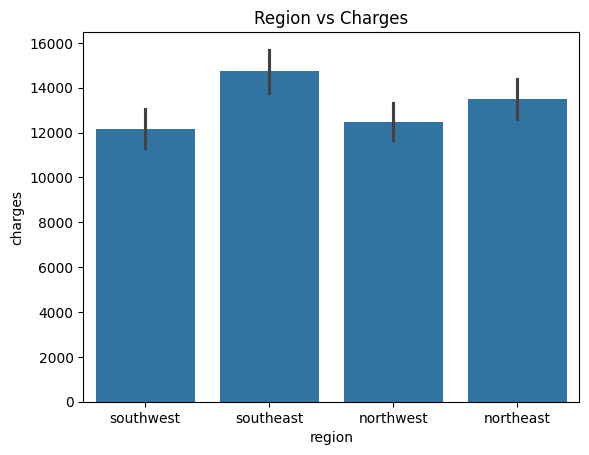

In [40]:
sns.barplot(data=df,x='region',y='charges')
plt.title('Region vs Charges')
plt.show()

Region is not much important in increase in charges. 

## Multivariate

In [41]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


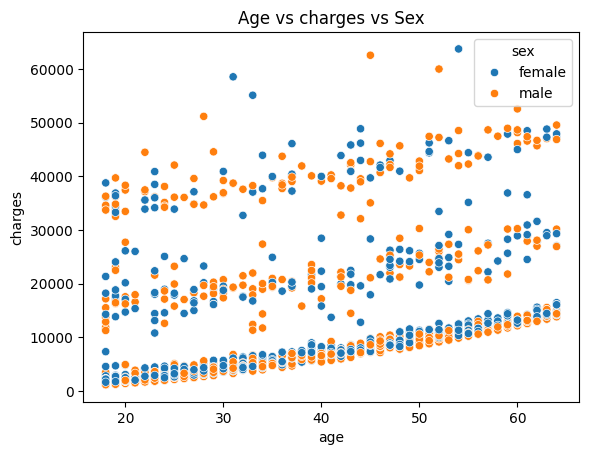

In [39]:
sns.scatterplot(data=df,x='age',y='charges',hue='sex')
plt.title("Age vs charges vs Sex")
plt.show()

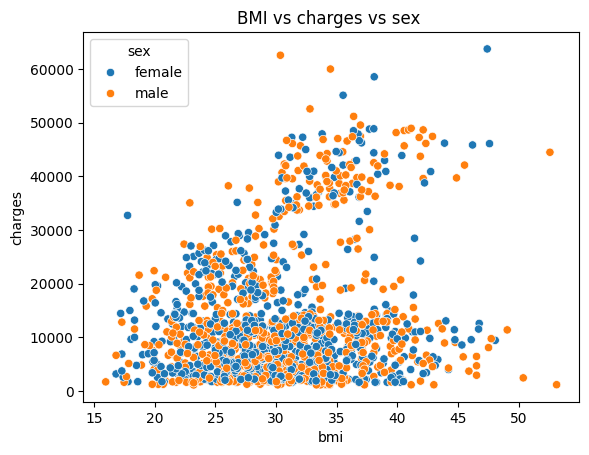

In [40]:
sns.scatterplot(data=df,x='bmi',y='charges',hue='sex')
plt.title("BMI vs charges vs sex ")
plt.show()

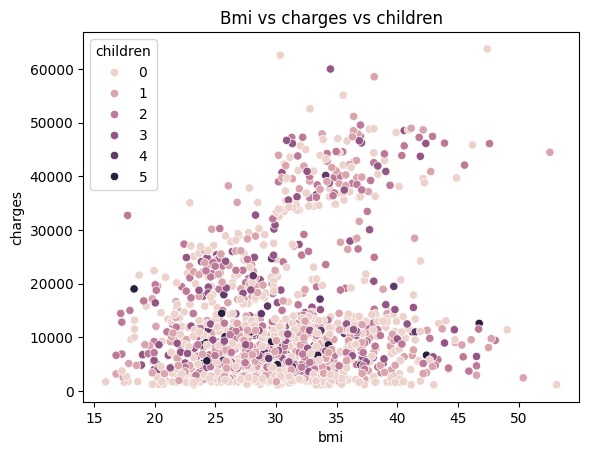

In [41]:
sns.scatterplot(data=df,x='bmi',y='charges',hue='children')
plt.title("Bmi vs charges vs children")
plt.show()

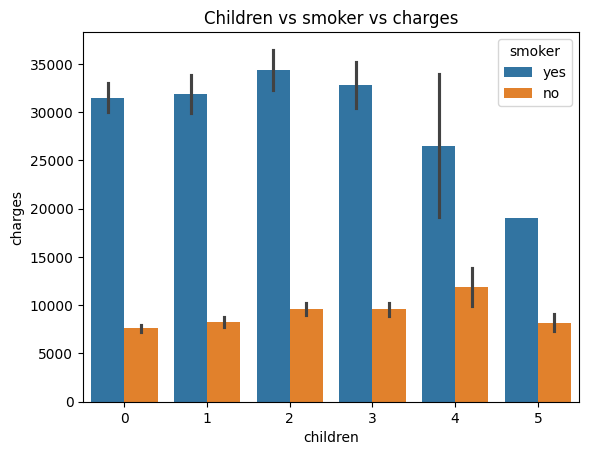

In [46]:
sns.barplot(data=df,x='children',y='charges',hue='smoker')
plt.title("Children vs smoker vs charges")
plt.show()

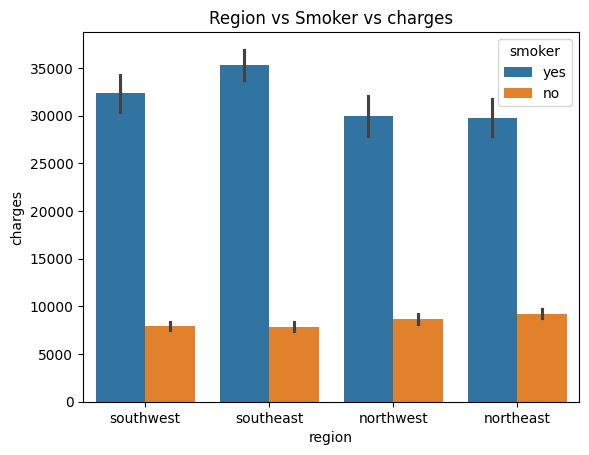

In [47]:
sns.barplot(data=df,x='region',y='charges',hue='smoker')
plt.title("Region vs Smoker vs charges")
plt.show()

# Feature Engineering
* Data Encoding
* Data Scaling
* Feature Extraction
* Feature Removal
* Checking for Correlation
* Checking for multicollinearity
* Handling outliers


### Data Encoding

Label encoding is a technique used to convert categorical data into numerical format. In label encoding, each unique category or value in a categorical variable is assigned an integer label. This is done by mapping each category to a unique integer.Label encoding can be implemented using libraries like scikit-learn in Python. The 'LabelEncoder' class from scikit-learn is commonly used for this purpose.

In [136]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


label_encoder = LabelEncoder(): This creates an instance of the LabelEncoder class from scikit-learn, which will be used to transform categorical values into numerical labels.\
df[col] = label_encoder.fit_transform(df[col]): For each column, it applies the fit_transform method of the LabelEncoder to transform the categorical values into numerical labels. The transformed labels are then assigned back to the corresponding column in the DataFrame df.

In [137]:
lb_sex= LabelEncoder()
df['sex']=lb_sex.fit_transform(df['sex'])
lb_smoker=LabelEncoder()
df['smoker']=lb_smoker.fit_transform(df['smoker'])
lb_region=LabelEncoder()
df['region']=lb_region.fit_transform(df['region'])

or this can use\
categorical_cols = df.select_dtypes(include =['object']).columns\
label_encoder=LabelEncoder()\
for col in categorical_cols:\
    df[col] = label_encoder.fit_transform(df[col])\
df

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int32  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int32  
 5   region    1337 non-null   int32  
 6   charges   1337 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


### Checking for correlation

A correlation matrix is a table that shows the correlation coefficients between multiple variables in a dataset. Each cell in the table represents the correlation coefficient between two variables. Typically, correlation matrices are square, with variables both as rows and columns.Correlation coefficients quantify the strength and direction of the linear relationship between two variables. The correlation coefficient can range from -1 to 1,A correlation coefficient of 1 indicates a perfect positive linear relationship. A correlation coefficient of -1 indicates a perfect negative linear relationship. A correlation coefficient of 0 indicates no linear relationship between the variables.Identifying Relationships,Feature Selection,Decision Making etc are its uses.

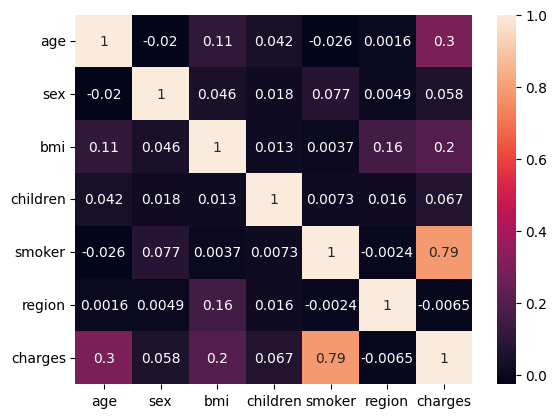

In [139]:
sns.heatmap(df.corr(),annot=True)
plt.show()

From this correlation matrix we select 'age','bmi','smoker','charges' for next step. because for 'sex', 'children','region' the correlation value is very least.

In [140]:
col=['age','bmi','smoker','charges']
df_new=df[col]
df_new

,age,bmi,smoker,charges
0,19,27.900,1,16884.92400
1,18,33.770,0,1725.55230
2,28,33.000,0,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1332,50,30.970,0,10600.54830
1333,18,31.920,0,2205.98080
1334,18,36.850,0,1629.83350
1335,21,25.800,0,2007.94500


### Checking for multicollinearity

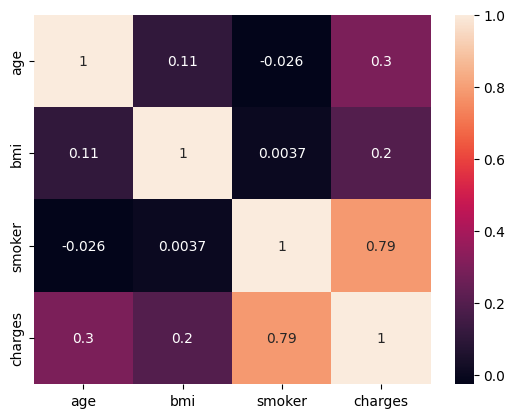

In [141]:
sns.heatmap(df_new.corr(),annot=True)
plt.show()

In [142]:
df_new

,age,bmi,smoker,charges
0,19,27.900,1,16884.92400
1,18,33.770,0,1725.55230
2,28,33.000,0,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1332,50,30.970,0,10600.54830
1333,18,31.920,0,2205.98080
1334,18,36.850,0,1629.83350
1335,21,25.800,0,2007.94500


### Data Scaling

Feature scaling is a preprocessing technique used in machine learning to standardize the range of independent variables or features in a dataset. The goal of feature scaling is to bring all features to the same scale or range, which can help improve the performance and convergence of machine learning algorithms.

In [143]:
std_age=StandardScaler()
df_new['age']=std_age.fit_transform(df_new[['age']])
std_bmi=StandardScaler()
df_new['bmi']=std_bmi.fit_transform(df_new[['bmi']])
std_smoker=StandardScaler()
df_new['smoker']=std_smoker.fit_transform(df_new[['smoker']])

C:\Users\user\AppData\Local\Temp\ipykernel_8944\3182554550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['age']=std_age.fit_transform(df_new[['age']])
C:\Users\user\AppData\Local\Temp\ipykernel_8944\3182554550.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['bmi']=std_bmi.fit_transform(df_new[['bmi']])
C:\Users\user\AppData\Local\Temp\ipykernel_8944\3182554550.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

or this can use\
columns_to_standardize = ['age','bmi','smoker']\
for col in columns_to_standardize:\
    scaler = StandardScaler()\
    df_new[col] = scaler.fit_transform(df_new[[col]])

In [144]:
df_new

,age,bmi,smoker,charges
0,-1.440418,-0.453160,1.969660,16884.92400
1,-1.511647,0.509422,-0.507702,1725.55230
2,-0.799350,0.383155,-0.507702,4449.46200
3,-0.443201,-1.305052,-0.507702,21984.47061
4,-0.514431,-0.292456,-0.507702,3866.85520
...,...,...,...,...
1332,0.767704,0.050269,-0.507702,10600.54830
1333,-1.511647,0.206053,-0.507702,2205.98080
1334,-1.511647,1.014490,-0.507702,1629.83350
1335,-1.297958,-0.797524,-0.507702,2007.94500


## Model Building

### Data Splitting

In [145]:
x=df_new.drop('charges',axis=1)
y=df_new['charges']
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42) 
print("Shape of x_train:",x_train.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of x_train: (1069, 3)
Shape of x_test: (268, 3)
Shape of y_train: (1069,)
Shape of y_test: (268,)


In [146]:
x

,age,bmi,smoker
0,-1.440418,-0.453160,1.969660
1,-1.511647,0.509422,-0.507702
2,-0.799350,0.383155,-0.507702
3,-0.443201,-1.305052,-0.507702
4,-0.514431,-0.292456,-0.507702
...,...,...,...
1332,0.767704,0.050269,-0.507702
1333,-1.511647,0.206053,-0.507702
1334,-1.511647,1.014490,-0.507702
1335,-1.297958,-0.797524,-0.507702


In [147]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1332    10600.54830
1333     2205.98080
1334     1629.83350
1335     2007.94500
1336    29141.36030
Name: charges, Length: 1337, dtype: float64

In [148]:
x_train

,age,bmi,smoker
1113,-1.155499,-1.009063,-0.507702
967,-1.297958,-0.806543,-0.507702
598,0.910164,1.125178,-0.507702
170,1.693691,1.772092,-0.507702
275,0.554015,-0.666338,-0.507702
...,...,...,...
1095,0.838934,0.704562,1.969660
1130,-0.870580,2.498538,-0.507702
1294,-1.369188,-1.420660,-0.507702
860,-0.087053,-0.436761,-0.507702


In [149]:
x_test


,age,bmi,smoker
899,0.696474,-1.336209,-0.507702
1063,-0.728120,-0.830321,-0.507702
1255,0.838934,0.938238,-0.507702
298,-0.585661,0.611091,1.969660
237,-0.585661,1.267024,-0.507702
...,...,...,...
534,1.764921,1.609749,-0.507702
542,1.693691,0.924299,-0.507702
759,-1.226729,0.642248,-0.507702
1283,1.551231,0.924299,1.969660


In [150]:
y_train

1113     2396.09590
967      3279.86855
598     33471.97189
170     13405.39030
275      9715.84100
           ...     
1095    44641.19740
1130     3693.42800
1294     1964.78000
860      7151.09200
1126     5836.52040
Name: charges, Length: 1069, dtype: float64

In [151]:
y_test

899      8688.85885
1063     5708.86700
1255    11436.73815
298     38746.35510
237      4463.20510
           ...     
534     13831.11520
542     13887.20400
759      3925.75820
1283    47403.88000
1284     8534.67180
Name: charges, Length: 268, dtype: float64

## Model Selection

Selecting the appropriate machine learning algorithm depends on various factors such as the nature of the problem, the characteristics of the data, the size of the dataset, computational resources available, and the desired outcomes. Regression problems involve predicting a continuous outcome variable based on one or more predictor variables. In other words, regression analysis is used to model the relationship between a dependent variable (the variable we want to predict) and one or more independent variables (the variables used to make the prediction).\

Machine learning is a subfield of artificial intelligence (AI) that focuses on the development of algorithms and statistical models that enable computers to learn from and make predictions or decisions based on data, without being explicitly programmed for each task.\

The main goal in regression analysis is to find the best-fitting mathematical model that describes the relationship between the independent variables and the dependent variable.\

* KNN
* Decision Tree Regressor
* Linear Regression
* Random Forest Regressor
* Adaboost Regressor

### K-Nearest Neighbors (KNN)

KNN is a non-parametric, instance-based learning algorithm used for classification and regression tasks. It predicts the output for a given input based on the majority class (for classification) or the average value (for regression) of its nearest neighbors in the feature space. KNN is simple to implement and effective for small datasets, but its performance can decrease with large datasets due to high computational cost.

In [157]:
Knn=KNeighborsRegressor(n_neighbors=7)
Knn.fit(x_train,y_train) # fit the model
y_pred_Knn=Knn.predict(x_test)
Knn_accuracy=Knn.score(x_test,y_test)
mse = mean_squared_error(y_test,y_pred_Knn)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred_Knn)
print("Knn accuracy:",Knn_accuracy)
print("mse:",mse)
print("rmse:",rmse)
print("r2:",r2)

Knn accuracy: 0.8821307867790591
mse: 21659182.69310121
rmse: 4653.942704105973
r2: 0.8821307867790591


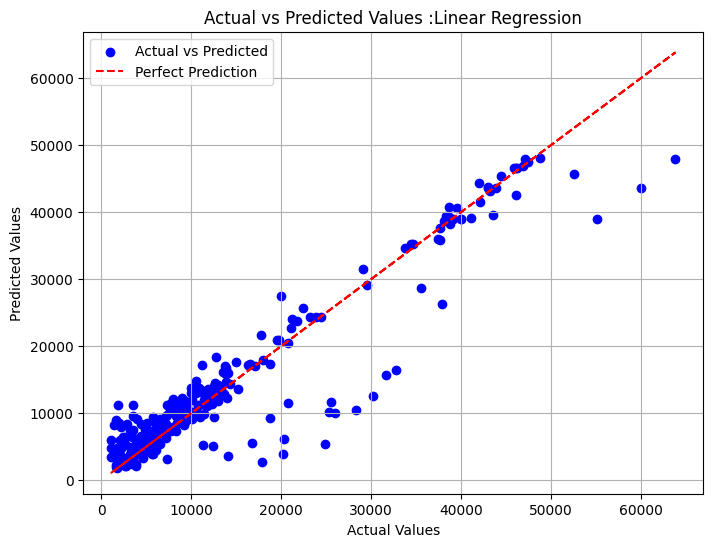

In [165]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_Knn, color='blue', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Values :Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

### Decision Tree Regressor

A Decision Tree is a non-parametric, supervised learning algorithm used for classification and regression tasks. It works by recursively splitting the dataset into subsets based on feature values to form a tree-like structure. Each internal node represents a feature test, each branch represents an outcome, and each leaf node represents a final prediction. Decision Trees are easy to interpret and handle both categorical and numerical data, but they can overfit the data if not properly regularized.

In [159]:
Decision_tree= DecisionTreeRegressor(random_state=42)
Decision_tree.fit(x_train,y_train)
y_pred_Decision_tree= Decision_tree.predict(x_test)
Decision_tree_accuracy=Decision_tree.score(x_test,y_test)
mse = mean_squared_error(y_test,y_pred_Decision_tree)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred_Decision_tree)
print("Accuracy:",Decision_tree_accuracy)
print("mse:",mse)
print("rmse:",rmse)
print("r2:",r2)

Accuracy: 0.792632179758902
mse: 38105094.4562864
rmse: 6172.932403346597
r2: 0.792632179758902


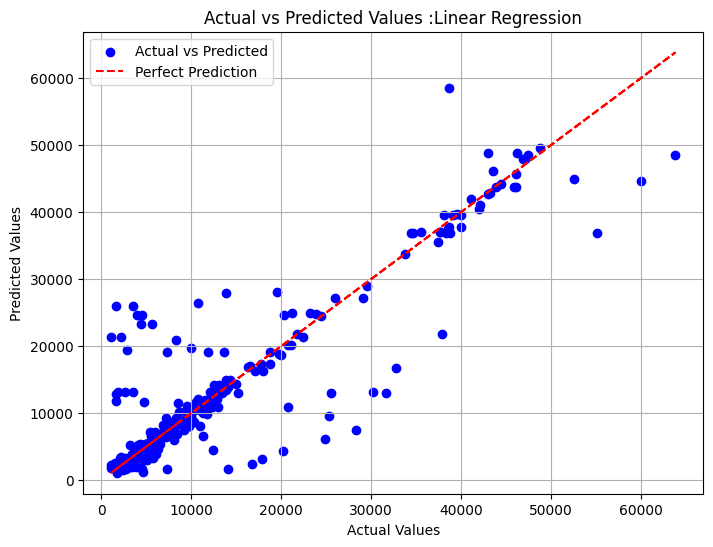

In [166]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_Decision_tree, color='blue', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Values :Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

### Linear Regression

Simple and commonly used algorithm for regression tasks.
Fits a linear relationship between the input features and the target variable.
Assumes a linear relationship between the predictors and the target variable.

In [160]:
Linear_Regression= LinearRegression()
Linear_Regression.fit(x_train, y_train)
y_pred_Linear_Regression=Linear_Regression.predict(x_test)
Linear_Regression_accuracy=Linear_Regression.score(x_test,y_test)
mse = mean_squared_error(y_test,y_pred_Linear_Regression)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred_Linear_Regression)
print("Accuray:",Linear_Regression_accuracy)
print("mse:",mse)
print("rmse:",rmse)
print("r2:",r2)

Accuray: 0.8049502474643171
mse: 35841574.81814755
rmse: 5986.783344847845
r2: 0.8049502474643171


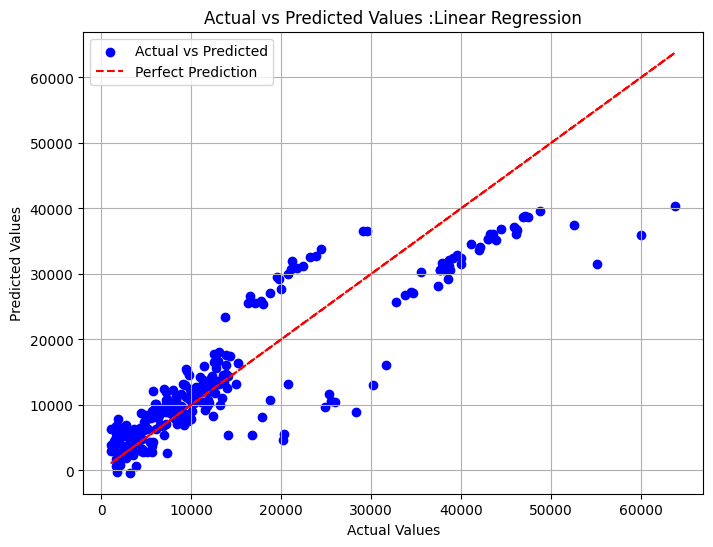

In [167]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_Linear_Regression, color='blue', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Values :Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

## Ensemble model

An Ensemble Model combines predictions from multiple base models to improve overall performance and robustness. It leverages the diversity among individual models to reduce errors like overfitting or underfitting. Ensemble techniques are broadly categorized into:\

* Bagging (Bootstrap Aggregating):\

Combines predictions by averaging (regression) or majority voting (classification).\
Example: Random Forest.\

* Boosting:

Builds models sequentially, where each model focuses on correcting the errors of the previous one.\
Example: AdaBoost.\


### Random Forest Regressor

Random Forest is an ensemble learning method that combines multiple Decision Trees to improve accuracy and reduce overfitting. It works by training each tree on a random subset of data and features, then aggregating their predictions (majority vote for classification or averaging for regression). It is robust, handles large datasets well, and works with both numerical and categorical data.

In [161]:
Random_forest= RandomForestRegressor(n_estimators=100,random_state=42)
Random_forest.fit(x_train,y_train)
y_pred_Random_forest= Random_forest.predict(x_test)
Random_forest_accuracy= Random_forest.score(x_test,y_test)
mse = mean_squared_error(y_test,y_pred_Random_forest)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred_Random_forest)
print("Accuracy:",Random_forest_accuracy)
print("mse:",mse)
print("rmse:",rmse)
print("r2:",r2)

Accuracy: 0.8777417994363664
mse: 22465685.732320618
rmse: 4739.79806872831
r2: 0.8777417994363664


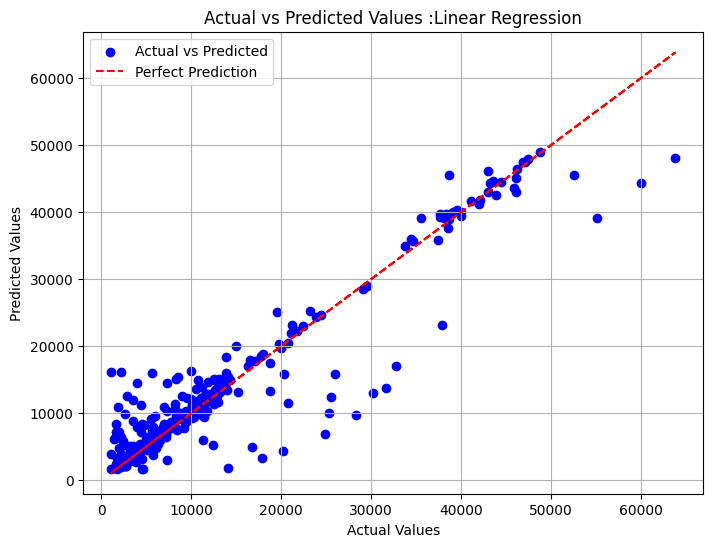

In [164]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_Random_forest, color='blue', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Values :Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

### Adaboost Regressor

AdaBoost Regressor is an ensemble method that combines multiple weak learners (usually Decision Trees) to improve regression accuracy. It trains models sequentially, where each new model focuses on correcting the errors of the previous ones. The final prediction is a weighted sum of all models. It works well for complex data but is sensitive to noise and outliers.

In [162]:
Adaboost_regressor=AdaBoostRegressor()
Adaboost_regressor.fit(x_train,y_train)
y_pred_Adaboost_regressor= Adaboost_regressor.predict(x_test)
Adaboost_regressor_accuracy=Adaboost_regressor.score(x_test,y_test)
mse = mean_squared_error(y_test,y_pred_Adaboost_regressor)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred_Adaboost_regressor)
print("Accuracy:",Adaboost_regressor_accuracy)
print("mse:",mse)
print("rmse:",rmse)
print("r2:",r2)

Accuracy: 0.8704250954706799
mse: 23810174.454809077
rmse: 4879.567035589231
r2: 0.8704250954706799


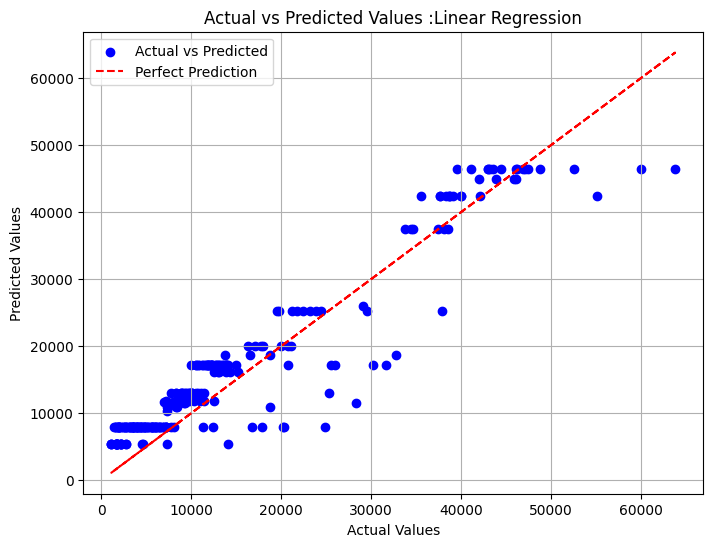

In [163]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_Adaboost_regressor, color='blue', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Values :Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

### Compare and evaluate the Model results and find the best model

In [ ]:
models = [
    ('K-Nearest Neighbors',KNeighborsRegressor(n_neighbors=7)),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Adaboost Regressor',AdaBoostRegressor())
]
results = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
   
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results.append([name, mse, rmse, r2])
results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'RMSE', 'R-squared'])
print("Model Comparison:")
print(results_df)

best_mse = results_df['MSE'].idxmin()
best_rmse = results_df['RMSE'].idxmin()
best_r2 = results_df['R-squared'].idxmax()
best_model = results_df.loc[[best_mse, best_rmse, best_r2]].iloc[0]
print("\nBest performing models based on metrics:")
print(best_model)

### To predict the price

insurance_predictor function seems to predict insurance prices using a K-Nearest Neighbors (KNN) model after scaling the input features (age and BMI).\

* Input Features: The function takes three inputs:

age (int): Age of the user.\
bmi (float): Body Mass Index of the user.

smoker (int): Whether the user is a smoker (1 for Yes, 0 for No).\

* Feature Scaling:

std_age.transform([[age]]): Scales the age using a pre-fitted scaler (likely StandardScaler).\
std_bmi.transform([[bmi]]): Scales the bmi similarly.\

* Prediction:

The scaled features, along with smoker, are used as input to a pre-trained KNN model (Knn.predict).\
The model predicts the insurance price based on these inputs.\

* Output:

The predicted price is returned.\
The result is displayed with a message, formatted for better readability.\

In [123]:
def insurance_predictor(age,bmi,smoker):
    age_scale = std_age.transform([[age]])[0,0]
    bmi_scale = std_bmi.transform([[bmi]])[0,0]
    price = Knn.predict([[age_scale,bmi_scale,smoker]])
    return price

age= int(input("Enter your age :"))
bmi= float(input("Enter your bmi :"))
smoker= int(input("Are you a smoker :\n0. No \n1. Yes\n"))
insurance_price = insurance_predictor(age,bmi,smoker)[0]
print(f"The eligible insurance price as per your history is {insurance_price}")

Enter your age :18
Enter your bmi :33.77
Are you a smoker :
0. No 
1. Yes
0
The eligible insurance price as per your history is 2869.7438142857145


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In the case of ensemble model Random Forest has high r2 value. So we use Random Forest for prediction.

In [58]:
def insurance_predictor(age,bmi,smoker):
    age_scale = std_age.transform([[age]])[0,0]
    bmi_scale = std_bmi.transform([[bmi]])[0,0]
    price = Random_forest.predict([[age_scale,bmi_scale,smoker]])
    return price

age= int(input("Enter your age :"))
bmi= float(input("Enter your bmi :"))
smoker= int(input("Are you a smoker :\n0. No \n1. Yes\n"))
insurance_price = insurance_predictor(age,bmi,smoker)[0]
print(f"The eligible insurance price as per your history is {insurance_price}")

Enter your age :24
Enter your bmi :52
Are you a smoker :
0. No 
1. Yes
0
The eligible insurance price as per your history is 3202.591410199999


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## Conclusion

* Age:\
Medical insurance prices tend to rise with age. As people age, they are more likely to develop health conditions that lead to higher insurance claims, making age a significant predictor of insurance costs.\
The machine learning model highlighted age as a key feature influencing insurance prices.

* BMI:\
Higher BMI values are associated with increased medical insurance costs. This reflects the higher risk of chronic conditions like diabetes, hypertension, and cardiovascular diseases among individuals with elevated BMI.\
BMI was identified as a critical factor in predicting insurance prices, emphasizing its importance in health risk assessment.

* Smoking Status:\
Smokers were found to pay significantly higher medical insurance prices compared to non-smokers. This aligns with the increased health risks and medical expenses associated with smoking-related diseases.\
The model effectively captured the substantial impact of smoking on insurance costs, underscoring its role as a decisive variable.


The analysis confirmed that age, BMI, and smoking status significantly influence medical insurance prices. These findings validate the use of these features in pricing strategies for insurance companies and highlight areas for potential health interventions to reduce insurance costs. The machine learning model successfully demonstrated its capability to predict medical insurance prices based on these factors, providing valuable insights for both insurers and policyholders.